Irisu klasifikacija

In [31]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [32]:
df = pd.read_csv('/home/ro/PycharmProjects/My/Iris classification/iris-species/Iris.csv') 

In [34]:
del df["Id"]
df.shape
#print(df.head(10))

(150, 5)

In [35]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [36]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3.4 Class Distribution

Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [38]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### We can see that each class has the same number of instances (50 or 33% of the dataset).

## 4. Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

    Univariate plots to better understand each attribute.
    Multivariate plots to better understand the relationships between attributes.

## 4.1 Univariate Plots

We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

<function matplotlib.pyplot.show(*args, **kw)>

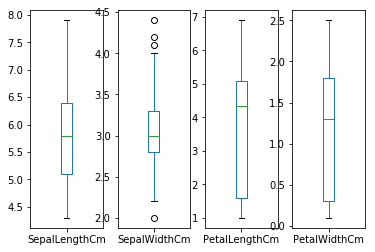

In [54]:
df.plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False)
plt.show

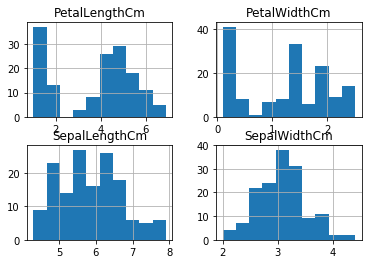

In [46]:
df.hist()
plt.show()

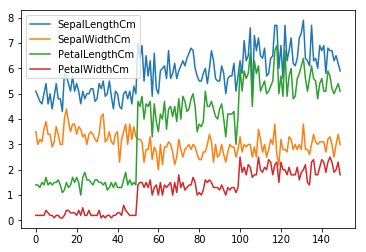

In [47]:
df.plot()
plt.show()

cia matos ryskus suoliai ties 50 ir 100 pettal length ir petal with

## 4.2 Multivariate Plots

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

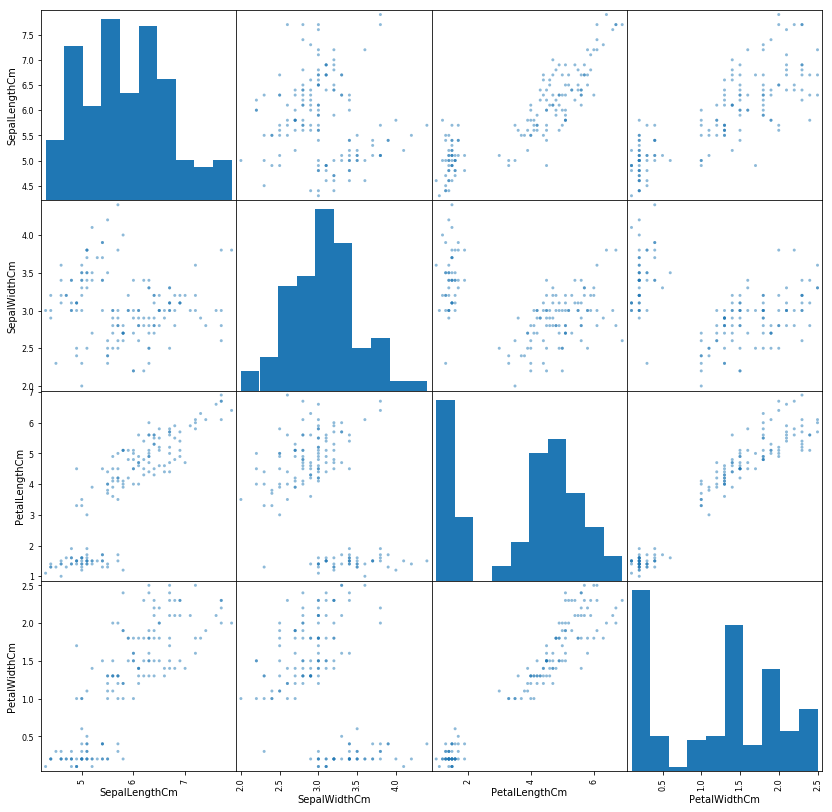

In [60]:
scatter_matrix(df, figsize=(14, 14))#figsize=() keicia dydi ploto
plt.show()

## 5. Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

    Separate out a validation dataset.
    Set-up the test harness to use 10-fold cross validation.
    Build 5 different models to predict species from flower measurements
    Select the best model.


## 5.1 Create a Validation Dataset

We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [63]:
#split-out validation dataset
array = df.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.20#validation size nustatom
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state = seed)

## 5.2 Test Harness

We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [64]:
seed = 7
scoring = 'accuracy'

The specific random seed does not matter, learn more about pseudorandom number generators here:

    Introduction to Random Number Generators for Machine Learning in Python
    https://machinelearningmastery.com/introduction-to-random-number-generators-for-machine-learning/

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 5.3 Build Models

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

    Logistic Regression (LR)
    Linear Discriminant Analysis (LDA)
    K-Nearest Neighbors (KNN).
    Classification and Regression Trees (CART).
    Gaussian Naive Bayes (NB).
    Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our models:

In [65]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate each model in turn

results = []
names = []

for name, model in models:
    kfold = models_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    
    #https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

NameError: name 'models_selection' is not defined